In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from synutility.SynIO.data_type import load
from synutility.SynVis.graph_visualizer import GraphVisualizer
from typing import Tuple
import time
from itertools import chain, combinations
import pandas as pd
import numpy as np
from numpy.linalg import matrix_rank

In [50]:
data = load('data/ITS_graphs.pkl.gz')

In [53]:
# WP 1: find reaction center

def get_reaction_center(its_graph):

    def filter_rcs(G, u, v):
        return G.edges[u, v]['standard_order'] != 0
    
    reaction_center = nx.subgraph_view(its_graph, filter_edge=lambda u, v: filter_rcs(its_graph, u, v)).copy()
    reaction_center.remove_nodes_from(list(nx.isolates(reaction_center)))

    return reaction_center

In [54]:
# WP 1: calculate all reaction centers

for reaction in data:
    
    its_graph = reaction['ITS']
    reaction_center = get_reaction_center(its_graph)
    reaction['RC'] = reaction_center

In [55]:
data[0]

{'R-id': 7873,
 'ITS': <networkx.classes.graph.Graph at 0x2178dc5e810>,
 'class': 0,
 'RC': <networkx.classes.graph.Graph at 0x217907b7590>}

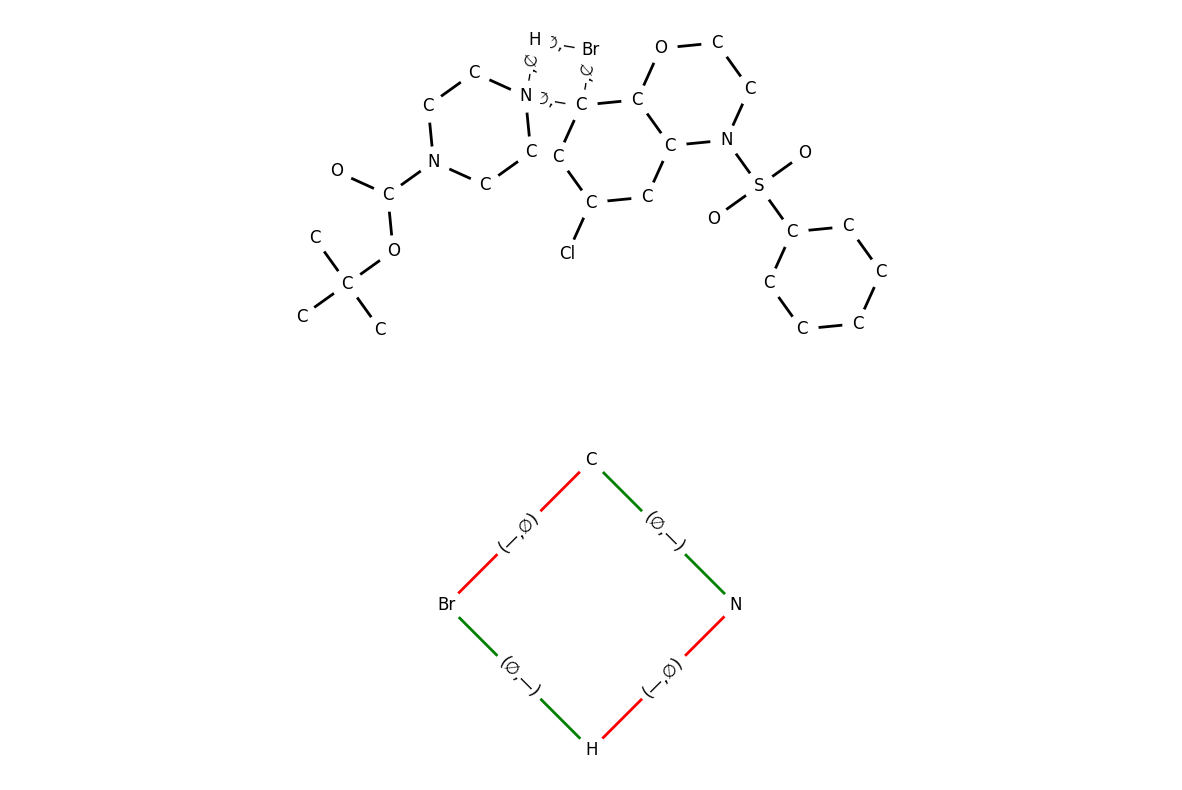

In [56]:
its_graph = data[0]['ITS']
reaction_center = data[0]['RC']

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
vis = GraphVisualizer()

# Plot ITS graph and its reaction center
vis.plot_its(its_graph, ax[0], use_edge_color=True)
vis.plot_its(reaction_center, ax[1], use_edge_color=True)

# Display the plots
plt.show()

In [57]:
# WP 2:

clusters = dict()

for reaction in data:
    rc = reaction['RC']
    for rc_key in clusters.keys():

        if nx.is_isomorphic(
            rc,
            rc_key,
            lambda n1, n2: n1['charge'] == n2['charge'] and n1['element'] == n2['element'],
            lambda e1, e2: e1['order'] == e2['order']
        ):
            clusters[rc_key].append(reaction)
            break
    else:

        clusters[rc] = [reaction]

In [58]:
len(clusters)

299

In [59]:
clusters

{<networkx.classes.graph.Graph at 0x217907b7590>: [{'R-id': 7873,
   'ITS': <networkx.classes.graph.Graph at 0x2178dc5e810>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x217907b7590>},
  {'R-id': 40699,
   'ITS': <networkx.classes.graph.Graph at 0x217d6b45d90>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x21847a0dd90>},
  {'R-id': 49431,
   'ITS': <networkx.classes.graph.Graph at 0x217d6e4a150>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x218471b2e50>},
  {'R-id': 38056,
   'ITS': <networkx.classes.graph.Graph at 0x217d6ec0810>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x21847c78590>},
  {'R-id': 44597,
   'ITS': <networkx.classes.graph.Graph at 0x217d6fcdb90>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x218461ea9d0>},
  {'R-id': 45542,
   'ITS': <networkx.classes.graph.Graph at 0x217d700e590>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x21845e48c50>},
  {'R-id': 29514,
   'ITS': <networkx.classes.

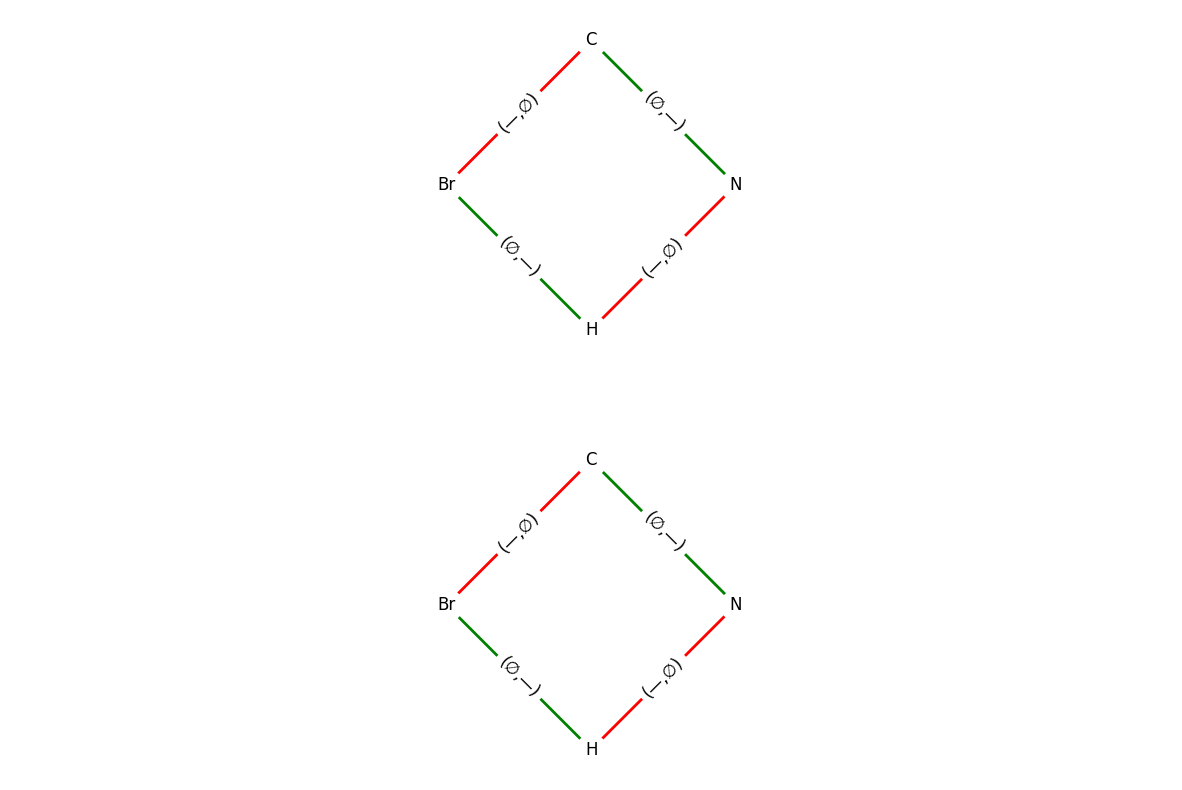

In [60]:
first_cluster = next(iter(clusters.values()))

rc1 = first_cluster[0]['RC']
rc2 = first_cluster[1]['RC']

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
vis = GraphVisualizer()

# Plot ITS graph and its reaction center
vis.plot_its(rc1, ax[0], use_edge_color=True)
vis.plot_its(rc2, ax[1], use_edge_color=True)

# Display the plots
plt.show()

In [61]:
len(data)

34395

In [100]:
# WP 3:


def vertex_count(G: nx.Graph) -> int:
    return G.number_of_nodes()

def edge_count(G: nx.Graph) -> int:
    return G.number_of_edges()

def vertex_degrees(G: nx.Graph) -> Tuple[int]:
    degree_list = [v for _, v in G.degree()]
    degree_list.sort()
    return tuple(degree_list)

def algebraic_connectivity(G: nx.Graph) -> float:
    return nx.algebraic_connectivity(G, seed=1337)

def rank(G: nx.Graph) -> int:
    adjacency_matrix = nx.to_numpy_array(G)
    return int(matrix_rank(adjacency_matrix))

# WP 4 (Version A):

def weisfeiler_lehman_graph_hash(G: nx.Graph, iterations: int = 3) -> str:
    for node, data in G.nodes(data=True):
        charge = data.get('charge', '')
        element = data.get('element', '')
        G.nodes[node]['combined'] = f"{charge}{element}"
    
    return nx.weisfeiler_lehman_graph_hash(G, edge_attr='order', node_attr='combined', iterations=iterations)
    

def weisfeiler_lehman_graph_hash_no_attributes(G: nx.Graph, iterations: int = 3) -> str:
    
    return nx.weisfeiler_lehman_graph_hash(G, iterations=iterations)

invariant_functions = {
    "vertex_count": vertex_count,
    "edge_count": edge_count,
    "vertex_degrees": vertex_degrees,
#    "algebraic_connectivity": algebraic_connectivity,
    "rank": rank,
#    "weisfeiler_lehman_graph_hash_(1)": lambda G: weisfeiler_lehman_graph_hash(G, 1),
#    "weisfeiler_lehman_graph_hash_(2)": lambda G: weisfeiler_lehman_graph_hash(G, 2),
    "weisfeiler_lehman_graph_hash_(3)": lambda G: weisfeiler_lehman_graph_hash(G, 3),
#    "weisfeiler_lehman_graph_hash_(4)": lambda G: weisfeiler_lehman_graph_hash(G, 4),
#    "weisfeiler_lehman_graph_hash_(5)": lambda G: weisfeiler_lehman_graph_hash(G, 5),
#    "weisfeiler_lehman_graph_hash_no_attributes_(1)": lambda G: weisfeiler_lehman_graph_hash_no_attributes(G, 1),
#    "weisfeiler_lehman_graph_hash_no_attributes_(2)": lambda G: weisfeiler_lehman_graph_hash_no_attributes(G, 2),
    "weisfeiler_lehman_graph_hash_no_attributes_(3)": lambda G: weisfeiler_lehman_graph_hash_no_attributes(G, 3),
    "weisfeiler_lehman_graph_hash_no_attributes_(4)": lambda G: weisfeiler_lehman_graph_hash_no_attributes(G, 4),
#    "weisfeiler_lehman_graph_hash_no_attributes_(5)": lambda G: weisfeiler_lehman_graph_hash_no_attributes(G, 5),
}

In [101]:
graph_invariants = dict()

for invariant_name, invariant_func in invariant_functions.items():

    start_time = time.time()

    graph_invariants[invariant_name] = {
        "reactions": {}
    }
    
    for reaction in data:

        r_id = reaction['R-id']

        graph_invariants[invariant_name]['reactions'][r_id] = invariant_func(reaction['RC'])


    end_time = time.time()

    graph_invariants[invariant_name]['execution_time_ms'] = (end_time - start_time) * 1000

In [102]:
graph_invariants

{'vertex_count': {'reactions': {7873: 4,
   42468: 4,
   24541: 4,
   40699: 4,
   34914: 4,
   11951: 4,
   15509: 4,
   49367: 4,
   28488: 4,
   10715: 4,
   7385: 6,
   32017: 4,
   24945: 4,
   49431: 4,
   41185: 4,
   25198: 4,
   42074: 4,
   1921: 4,
   24357: 4,
   6834: 4,
   32739: 4,
   21831: 6,
   14713: 4,
   17390: 4,
   38056: 4,
   47274: 4,
   4637: 4,
   34081: 4,
   18907: 4,
   2838: 4,
   23554: 6,
   8803: 4,
   6210: 4,
   33176: 4,
   8938: 4,
   27522: 4,
   47398: 4,
   33888: 4,
   36441: 4,
   10990: 4,
   1379: 4,
   38557: 5,
   15542: 4,
   23298: 4,
   22156: 4,
   45034: 4,
   21379: 4,
   15631: 4,
   12858: 6,
   8101: 4,
   5875: 4,
   1000: 4,
   44597: 4,
   25192: 4,
   37130: 4,
   11740: 4,
   24680: 4,
   4479: 4,
   45542: 4,
   4468: 4,
   10980: 4,
   49116: 4,
   7333: 4,
   4477: 4,
   15526: 4,
   46834: 4,
   26260: 4,
   5061: 4,
   4789: 4,
   1817: 4,
   14872: 4,
   29514: 4,
   32548: 4,
   39891: 4,
   2604: 4,
   34830: 6,
   2

In [103]:
for key, value in graph_invariants.items():
    print(f"{key}:  {value['execution_time_ms']:6f} ms")

vertex_count:  40.086985 ms
edge_count:  131.579399 ms
vertex_degrees:  101.247787 ms
rank:  1484.025955 ms
weisfeiler_lehman_graph_hash_(3):  1867.508888 ms
weisfeiler_lehman_graph_hash_no_attributes_(3):  1032.809258 ms
weisfeiler_lehman_graph_hash_no_attributes_(4):  1222.454071 ms


In [104]:
graph_invariant_keys = list(graph_invariants.keys())
invariant_powerset = list(chain.from_iterable(combinations(graph_invariant_keys, r) for r in range(1, len(graph_invariant_keys) + 1)))
invariant_powerset

[('vertex_count',),
 ('edge_count',),
 ('vertex_degrees',),
 ('rank',),
 ('weisfeiler_lehman_graph_hash_(3)',),
 ('weisfeiler_lehman_graph_hash_no_attributes_(3)',),
 ('weisfeiler_lehman_graph_hash_no_attributes_(4)',),
 ('vertex_count', 'edge_count'),
 ('vertex_count', 'vertex_degrees'),
 ('vertex_count', 'rank'),
 ('vertex_count', 'weisfeiler_lehman_graph_hash_(3)'),
 ('vertex_count', 'weisfeiler_lehman_graph_hash_no_attributes_(3)'),
 ('vertex_count', 'weisfeiler_lehman_graph_hash_no_attributes_(4)'),
 ('edge_count', 'vertex_degrees'),
 ('edge_count', 'rank'),
 ('edge_count', 'weisfeiler_lehman_graph_hash_(3)'),
 ('edge_count', 'weisfeiler_lehman_graph_hash_no_attributes_(3)'),
 ('edge_count', 'weisfeiler_lehman_graph_hash_no_attributes_(4)'),
 ('vertex_degrees', 'rank'),
 ('vertex_degrees', 'weisfeiler_lehman_graph_hash_(3)'),
 ('vertex_degrees', 'weisfeiler_lehman_graph_hash_no_attributes_(3)'),
 ('vertex_degrees', 'weisfeiler_lehman_graph_hash_no_attributes_(4)'),
 ('rank', 'weis

In [105]:
invariant_clusters = dict()

for invariant_combination in invariant_powerset:
    
    clusters = dict()
    total_execution_time_ms = 0

    for invariant_name in invariant_combination:
        total_execution_time_ms += graph_invariants[invariant_name]['execution_time_ms']

    for reaction in data:
        r_id = reaction['R-id']

        invariant_aggregation = []
        for invariant_name in invariant_combination:
            invariant_aggregation.append(graph_invariants[invariant_name]['reactions'][r_id])

        invariant_tuple = tuple(invariant_aggregation)

        if invariant_tuple in clusters:
            clusters[invariant_tuple].append(r_id)
        else:
            clusters[invariant_tuple] = [r_id]

    invariant_clusters[invariant_combination] = {
        "clusters": clusters,
        "execution_time_ms": total_execution_time_ms,
    }


In [106]:
cluster_benchmarks = dict()

for key, value in invariant_clusters.items():

    clusters = value['clusters']
    execution_time_ms = value['execution_time_ms']
    cluster_variance = 0
    for cluster in clusters.values():
        cluster_variance += len(cluster) ** 2

    cluster_benchmarks[key] = {
        "execution_time_ms": execution_time_ms,
        "num_clusters": len(clusters),
        "num_clusters/ms": (len(clusters) / execution_time_ms),
        "variance": cluster_variance,
        "variance/ms": (cluster_variance / execution_time_ms)
    }

In [107]:
benchmark_df = pd.DataFrame.from_dict(cluster_benchmarks, orient="columns").T


In [108]:
benchmark_df[benchmark_df.index.to_frame().iloc[:, 1:].isna().all(axis=1)]

execution_time_ms  \
vertex_count                                   NaN NaN NaN NaN NaN NaN          40.086985   
edge_count                                     NaN NaN NaN NaN NaN NaN         131.579399   
vertex_degrees                                 NaN NaN NaN NaN NaN NaN         101.247787   
rank                                           NaN NaN NaN NaN NaN NaN        1484.025955   
weisfeiler_lehman_graph_hash_(3)               NaN NaN NaN NaN NaN NaN        1867.508888   
weisfeiler_lehman_graph_hash_no_attributes_(3) NaN NaN NaN NaN NaN NaN        1032.809258   
weisfeiler_lehman_graph_hash_no_attributes_(4) NaN NaN NaN NaN NaN NaN        1222.454071   

                                                                        num_clusters  \
vertex_count                                   NaN NaN NaN NaN NaN NaN          12.0   
edge_count                                     NaN NaN NaN NaN NaN NaN          16.0   
vertex_degrees                                 NaN NaN NaN NaN NaN NaN          57.0   
rank                                           NaN NaN NaN NaN NaN NaN          10.0   
weisfeiler_lehman_graph_hash_(3)               NaN NaN NaN NaN NaN NaN         299.0   
weisfeiler_lehman_graph_hash_no_attributes_(3) NaN NaN NaN NaN NaN NaN          73.0   
weisfeiler_lehman_graph_hash_no_attributes_(4) NaN NaN NaN NaN NaN NaN          73.0   

                                                                        num_clusters/ms  \
vertex_count                                   NaN NaN NaN NaN NaN NaN         0.299349   
edge_count                                     NaN NaN NaN NaN NaN NaN         0.121600   
vertex_degrees                                 NaN NaN NaN NaN NaN NaN         0.562975   
rank                                           NaN NaN NaN NaN NaN NaN         0.006738   
weisfeiler_lehman_graph_hash_(3)               NaN NaN NaN NaN NaN NaN         0.160106   
weisfeiler_lehman_graph_hash_no_attributes_(3) NaN NaN NaN NaN NaN NaN         0.070681   
weisfeiler_lehman_graph_hash_no_attributes_(4) NaN NaN NaN NaN NaN NaN         0.059716   

                                                                           variance  \
vertex_count                                   NaN NaN NaN NaN NaN NaN  879322393.0   
edge_count                                     NaN NaN NaN NaN NaN NaN  875995481.0   
vertex_degrees                                 NaN NaN NaN NaN NaN NaN  863788643.0   
rank                                           NaN NaN NaN NaN NaN NaN  922628037.0   
weisfeiler_lehman_graph_hash_(3)               NaN NaN NaN NaN NaN NaN   82559161.0   
weisfeiler_lehman_graph_hash_no_attributes_(3) NaN NaN NaN NaN NaN NaN  863628655.0   
weisfeiler_lehman_graph_hash_no_attributes_(4) NaN NaN NaN NaN NaN NaN  863628655.0   

                                                                         variance/ms  
vertex_count                                   NaN NaN NaN NaN NaN NaN  2.193536e+07  
edge_count                                     NaN NaN NaN NaN NaN NaN  6.657543e+06  
vertex_degrees                                 NaN NaN NaN NaN NaN NaN  8.531432e+06  
rank                                           NaN NaN NaN NaN NaN NaN  6.217061e+05  
weisfeiler_lehman_graph_hash_(3)               NaN NaN NaN NaN NaN NaN  4.420818e+04  
weisfeiler_lehman_graph_hash_no_attributes_(3) NaN NaN NaN NaN NaN NaN  8.361938e+05  
weisfeiler_lehman_graph_hash_no_attributes_(4) NaN NaN NaN NaN NaN NaN  7.064712e+05

In [71]:
benchmark_df.sort_values("variance/ms", ascending=False)

execution_time_ms  \
vertex_count   NaN            NaN                              NaN                              NaN                              NaN                              NaN                                       34.074306   
vertex_degrees NaN            NaN                              NaN                              NaN                              NaN                              NaN                                       98.704338   
edge_count     NaN            NaN                              NaN                              NaN                              NaN                              NaN                                      111.473083   
vertex_count   vertex_degrees NaN                              NaN                              NaN                              NaN                              NaN                                      132.778645   
               edge_count     NaN                              NaN                              NaN                              NaN                              NaN                                      145.547390   
...                                                                                                                                                                                                               ...   
edge_count     rank           weisfeiler_lehman_graph_hash_(1) weisfeiler_lehman_graph_hash_(2) weisfeiler_lehman_graph_hash_(3) NaN                              NaN                                     5622.537851   
vertex_count   vertex_degrees rank                             weisfeiler_lehman_graph_hash_(1) weisfeiler_lehman_graph_hash_(2) weisfeiler_lehman_graph_hash_(3) NaN                                     5643.843412   
               edge_count     rank                             weisfeiler_lehman_graph_hash_(1) weisfeiler_lehman_graph_hash_(2) weisfeiler_lehman_graph_hash_(3) NaN                                     5656.612158   
edge_count     vertex_degrees rank                             weisfeiler_lehman_graph_hash_(1) weisfeiler_lehman_graph_hash_(2) weisfeiler_lehman_graph_hash_(3) NaN                                     5721.242189   
vertex_count   edge_count     vertex_degrees                   rank                             weisfeiler_lehman_graph_hash_(1) weisfeiler_lehman_graph_hash_(2) weisfeiler_lehman_graph_hash_(3)        5755.316496   

                                                                                                                                                                                                    num_clusters  \
vertex_count   NaN            NaN                              NaN                              NaN                              NaN                              NaN                                       12.0   
vertex_degrees NaN            NaN                              NaN                              NaN                              NaN                              NaN                                       57.0   
edge_count     NaN            NaN                              NaN                              NaN                              NaN                              NaN                                       16.0   
vertex_count   vertex_degrees NaN                              NaN                              NaN                              NaN                              NaN                                       57.0   
               edge_count     NaN                              NaN                              NaN                              NaN                              NaN                                       31.0   
...                                                                                                                                                                                                          ...   
edge_count     rank           weisfeiler_lehman_graph_hash_(1) weisfeiler_lehman_graph_hash_(2) weisfeiler_

In [72]:
benchmark_df.sort_values("variance", ascending=True)

execution_time_ms  \
weisfeiler_lehman_graph_hash_(3) NaN                              NaN NaN NaN NaN NaN        1786.343098   
vertex_count                     weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN        1820.417404   
weisfeiler_lehman_graph_hash_(2) weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN        3074.199200   
weisfeiler_lehman_graph_hash_(1) weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN        2592.656851   
vertex_degrees                   weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN        1885.047436   
...                                                                                                  ...   
vertex_count                     rank                             NaN NaN NaN NaN NaN        1664.626122   
                                 edge_count                       NaN NaN NaN NaN NaN         145.547390   
edge_count                       NaN                              NaN NaN NaN NaN NaN         111.473083   
vertex_count                     NaN                              NaN NaN NaN NaN NaN          34.074306   
rank                             NaN                              NaN NaN NaN NaN NaN        1630.551815   

                                                                                       num_clusters  \
weisfeiler_lehman_graph_hash_(3) NaN                              NaN NaN NaN NaN NaN         299.0   
vertex_count                     weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN         299.0   
weisfeiler_lehman_graph_hash_(2) weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN         299.0   
weisfeiler_lehman_graph_hash_(1) weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN         299.0   
vertex_degrees                   weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN         299.0   
...                                                                                             ...   
vertex_count                     rank                             NaN NaN NaN NaN NaN          30.0   
                                 edge_count                       NaN NaN NaN NaN NaN          31.0   
edge_count                       NaN                              NaN NaN NaN NaN NaN          16.0   
vertex_count                     NaN                              NaN NaN NaN NaN NaN          12.0   
rank                             NaN                              NaN NaN NaN NaN NaN          10.0   

                                                                                       num_clusters/ms  \
weisfeiler_lehman_graph_hash_(3) NaN                              NaN NaN NaN NaN NaN         0.167381   
vertex_count                     weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN         0.164248   
weisfeiler_lehman_graph_hash_(2) weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN         0.097261   
weisfeiler_lehman_graph_hash_(1) weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN         0.115326   
vertex_degrees                   weisfeiler_lehman_graph_hash_(3) NaN NaN NaN NaN NaN         0.158617   
...                                                                                                ...   
vertex_count                     rank                             NaN NaN NaN NaN NaN         0.018022   
                                 edge_count                       NaN NaN NaN NaN NaN         0.212989   
edge_count                       NaN                              NaN NaN NaN NaN NaN         0.143532   
vertex_count                     NaN                              NaN NaN NaN NaN NaN         0.352172   
rank                             NaN                              NaN NaN NaN NaN NaN         0.006133   

                                                                                          variance  \
weisfeiler_lehman_graph_hash_(3) NaN                              NaN NaN NaN NaN NaN   82559161.0   
vertex_count                     weisfeiler_lehman_graph_hash_(3) NaN NaN Na

In [73]:
benchmark_df.sort_values("num_clusters/ms", ascending=False)

execution_time_ms  \
vertex_degrees                   NaN                              NaN            NaN  NaN NaN NaN          98.704338   
vertex_count                     vertex_degrees                   NaN            NaN  NaN NaN NaN         132.778645   
weisfeiler_lehman_graph_hash_(1) NaN                              NaN            NaN  NaN NaN NaN         806.313753   
vertex_count                     weisfeiler_lehman_graph_hash_(1) NaN            NaN  NaN NaN NaN         840.388060   
                                 NaN                              NaN            NaN  NaN NaN NaN          34.074306   
...                                                                                                              ...   
                                 edge_count                       vertex_degrees rank NaN NaN NaN        1874.803543   
                                                                  rank           NaN  NaN NaN NaN        1776.099205   
edge_count                       rank                             NaN            NaN  NaN NaN NaN        1742.024899   
vertex_count                     rank                             NaN            NaN  NaN NaN NaN        1664.626122   
rank                             NaN                              NaN            NaN  NaN NaN NaN        1630.551815   

                                                                                                   num_clusters  \
vertex_degrees                   NaN                              NaN            NaN  NaN NaN NaN          57.0   
vertex_count                     vertex_degrees                   NaN            NaN  NaN NaN NaN          57.0   
weisfeiler_lehman_graph_hash_(1) NaN                              NaN            NaN  NaN NaN NaN         296.0   
vertex_count                     weisfeiler_lehman_graph_hash_(1) NaN            NaN  NaN NaN NaN         296.0   
                                 NaN                              NaN            NaN  NaN NaN NaN          12.0   
...                                                                                                         ...   
                                 edge_count                       vertex_degrees rank NaN NaN NaN          68.0   
                                                                  rank           NaN  NaN NaN NaN          53.0   
edge_count                       rank                             NaN            NaN  NaN NaN NaN          38.0   
vertex_count                     rank                             NaN            NaN  NaN NaN NaN          30.0   
rank                             NaN                              NaN            NaN  NaN NaN NaN          10.0   

                                                                                                   num_clusters/ms  \
vertex_degrees                   NaN                              NaN            NaN  NaN NaN NaN         0.577482   
vertex_count                     vertex_degrees                   NaN            NaN  NaN NaN NaN         0.429286   
weisfeiler_lehman_graph_hash_(1) NaN                              NaN            NaN  NaN NaN NaN         0.367103   
vertex_count                     weisfeiler_lehman_graph_hash_(1) NaN            NaN  NaN NaN NaN         0.352218   
                                 NaN                              NaN            NaN  NaN NaN NaN         0.352172   
...                                                                                                            ...   
                                 edge_count                       vertex_degrees rank NaN NaN NaN         0.036270   
                                                                  rank           NaN  NaN NaN NaN         0.029841   
edge_count                       rank                             NaN            NaN  NaN NaN NaN         0.021814   
vertex_count                     rank                             NaN            NaN  NaN NaN NaN

In [110]:
# WP 4 (Version B):

NUM_ITERATIONS = 10

node_hash_table = dict()
next_table_hash = 2

hash_clusters = dict()

# Step 1: Set base hash to 1

for reaction in data:

    G = reaction['RC']

    for node in G.nodes():
            
        G.nodes[node][f'hash_0'] = 1

hash_clusters['iteration_0'] = {
    '1': data
}

# Step 2: 

for i in range(1, NUM_ITERATIONS + 1):

    # Setup iteration cluster

    hash_clusters[f'iteration_{i}'] = dict()
    
    previous_iteration_hash_clusters = hash_clusters[f'iteration_{i - 1}']
    iteration_hash_clusters = hash_clusters[f'iteration_{i}']

    
    for cluster in previous_iteration_hash_clusters.values():

        # Calculate hashes:
        for reaction in cluster:

            G = reaction['RC']

            for node, node_data in G.nodes(data=True):

                hash = node_data.get(f'hash_{i - 1}')
                neighbor_hashes = []

                for neighbor in G.neighbors(node):
                    neighbor_hashes.append(G.nodes[neighbor][f'hash_{i - 1}'])

                neighbor_hashes_tuple = tuple(neighbor_hashes)

                new_hash_key = (hash, neighbor_hashes_tuple)

                if new_hash_key not in node_hash_table:
                    
                    node_hash_table[new_hash_key] = next_table_hash
                    next_table_hash += 1

                G.nodes[node][f'hash_{i}'] = node_hash_table[new_hash_key]      
                
        # Cluster:
        for reaction in cluster:
            
            G = reaction['RC']


            hash_multiset = tuple(sorted([node_data[f'hash_{i}'] for _, node_data in G.nodes(data=True)]))
            hash_multiset = tuple(sorted([node_data[f'hash_{i}'] for _, node_data in G.nodes(data=True)]))

            if hash_multiset not in iteration_hash_clusters:
                
                iteration_hash_clusters[hash_multiset] = [reaction]

            else:

                iteration_hash_clusters[hash_multiset].append(reaction)


In [93]:
for i in range(1, NUM_ITERATIONS + 1):
    print(len(hash_clusters[f'iteration_{i}']))

57
188
222
223
227
227
229
229
229
229


In [79]:
reaction_center